In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
image_ids = ["CA184632V0341", "CA184632V0342"]
transform_fld = "/data_1/ATM/data_1/georef/sat"

In [5]:
import src.load.load_image as li
import src.load.load_transform as lt

images = []
for image_id in image_ids:
    image = li.load_image(image_id)
    images.append(image)

transforms = []
for image_id in image_ids:
    transform = lt.load_transform(image_id + "_transform", transform_fld)
    transforms.append(transform)

In [9]:
import src.sfm.snippets.identify_gpcs as ig

points_dict = ig.identify_gcps(images, transforms)
print(points_dict)

100%|██████████| 4137/4137 [00:45<00:00, 91.68it/s] 

{(-1924362.0, 752400.0): {'image_ids': [0, 1], 'rel_coords': [(8936, 331), (5322, 638)], 'avg_abs_coord': array([-1924362.,   752400.]), 'abs_coords': [(-1924366, 752403), (-1924358, 752397)]}, (-1924153.5, 752244.5): {'image_ids': [0, 1], 'rel_coords': [(9263, 410), (5619, 717)], 'avg_abs_coord': array([-1924153.5,   752244.5]), 'abs_coords': [(-1924154, 752245), (-1924153, 752244)]}, (-1924546.0, 752369.5): {'image_ids': [0, 1], 'rel_coords': [(8728, 460), (5114, 767)], 'avg_abs_coord': array([-1924546. ,   752369.5]), 'abs_coords': [(-1924546, 752372), (-1924546, 752367)]}, (-1925127.5, 752546.0): {'image_ids': [0, 1], 'rel_coords': [(7936, 549), (4371, 846)], 'avg_abs_coord': array([-1925127.5,   752546. ]), 'abs_coords': [(-1925131, 752548), (-1925124, 752544)]}, (-1924888.5, 752407.0): {'image_ids': [0, 1], 'rel_coords': [(8292, 589), (4698, 896)], 'avg_abs_coord': array([-1924888.5,   752407. ]), 'abs_coords': [(-1924888, 752410), (-1924889, 752404)]}, (-1925093.0, 752477.5): {'

[(8936, 331), (9263, 410), (8728, 460), (7936, 549), (8292, 589), (8015, 608), (8639, 608), (4193, 648), (7688, 668), (9540, 727), (9599, 975), (7916, 1114), (6233, 1233), (9292, 1322), (6183, 1530), (9322, 1560), (9292, 1669), (6292, 1896), (4599, 1956), (4480, 2025), (4341, 2105), (4727, 2154), (5718, 2154), (7173, 2164), (6114, 2223), (5827, 2273), (7688, 2600), (7163, 2610), (7787, 2610), (9282, 2679), (7718, 3204), (5797, 7346), (5658, 7415), (8362, 8277), (8104, 8337), (8470, 8347), (6114, 8377), (6609, 8763), (8946, 8872)]


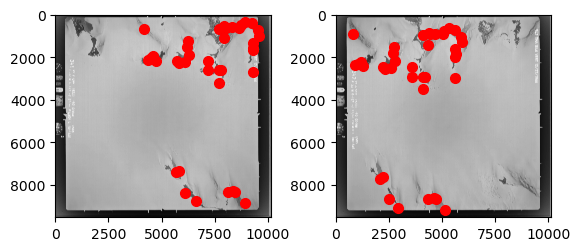

In [7]:
import src.display.display_images as di

rel_po_0 = []
rel_po_1 = []

for key, value in points_dict.items():
    image_ids = value['image_ids']
    relative_positions = value['relative_positions']
    
    # Assuming image_ids always contain 0 and 1 in that order if they exist
    if 0 in image_ids:
        index_0 = image_ids.index(0)
        rel_po_0.append(relative_positions[index_0])
    
    if 1 in image_ids:
        index_1 = image_ids.index(1)
        rel_po_1.append(relative_positions[index_1])

di.display_images(images, points=[rel_po_0, rel_po_1])